# About the dataset - Framing the Problem
****

This dataset contains 70,000 small images of handwritten digits. Each digit is labeled. I've decided to tackle this well-known classification problem to get the better understanding of the underlying data and to practice some classification algorithms.

# Importing the Libraries
****

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the Data
****

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# Explore the Data
****

In [3]:
X,y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


X - vector of features

y - label

Each image has 784 features (28x28 pixels, each feature - pixel's intensity)

Getting a look into one of the images:

Image: 


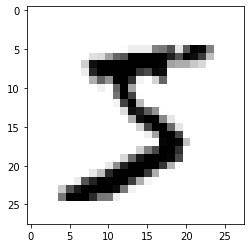

In [4]:
print("Image: ")
plt.imshow(X[0].reshape(28, 28), cmap = "binary")

In [5]:
print("Label: ")
y[0]

Label: 


'5'

In [6]:
y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Train the Model
****

Training the binary classifier (just for practice!) to get the information if the number on the photo is number 5 or not. Creating the variable - **target vector** that will be true for all 5s:

In [8]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [9]:
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(random_state = 0)

classifier.fit(X_train, y_train_5)

classifier.predict([X[0]])

array([False])

# Measuring Performance
****

**Confusion Matrix**

**cross_val_predict** function performs K-fold cross-validation and returns the predictions made on each test fold

In [10]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(classifier, X_train, y_train_5, cv = 3)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)

[[52931  1648]
 [  922  4499]]
